### What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [1]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [2]:
import numpy as np

In [179]:
a=np.zeros((3,7,7))
a=np.arange(147).reshape(3,7,7)

In [180]:
c = np.ones(27).reshape(3,3,3)
d = np.arange(27).reshape(3,3,3)

In [181]:
#function to extract a filter dimension matrix from one layer of the image matrix
def matrix_extraction(matrix, convolution, step):# input - 2d matrix i.e. a layer, a layer of the convolution filter
    matrows = matrix.shape[0]         #getting the dimensions                              # and stride lenth
    matcols = matrix.shape[1]  
    convrows = convolution.shape[0]
    convcols = convolution.shape[1]
    temp = []
    for row in range(0,matrows,step):
        if (row+convrows)<=matrows:  #checking conditions for the stride not to move out of the matrix
            for col in range(0,matcols,step):
                if (col+convcols)<=matcols:
                    q = matrix[row:row+convrows,col:col+convcols]
                    temp.append(q)
    temp = np.array(temp)
    return temp      

In [182]:
#function to compute the convolution on the sub matrices obtained from matrix_extraction function
def compute_convolution(matrix,convolution,submatrix, step,bias):# input - 2d matrix i.e. a layer, a layer of the convolution filter
    matrows = matrix.shape[0]         #getting the dimensions                              # and stride lenth and bias
    matcols = matrix.shape[1]
    convrows = convolution.shape[0]
    convcols = convolution.shape[1]
    oprows = ((matrows-convrows)//step)+1 #obtaining dimensions using emrical formula from cs231n.github.io/convolutional-networks/
    opcols = ((matcols-convcols)//step)+1
    temp = []
    for num in submatrix:
        q = ((num*convolution)+bias).sum()
        temp.append(q)
    temp = np.array(temp)
    conv = temp.reshape(oprows,opcols)
    return conv 

In [198]:
#function that calls compute_convolution and matrix_extraction for all layers of the image
def convolution(matrix,convolution,step,bias):
    height = matrix.shape[0]
    rows = matrix.shape[1]
    cols = matrix.shape[2]
    final = []
    for h in range(0,height): #iterating through height so that all the layers are covered
        sub = matrix_extraction(matrix[h],convolution[h],step)
        conv_layer = compute_convolution(matrix[h],convolution[h],sub,step,bias)
        final.append(conv_layer)
    return np.array(final)

In [199]:
final = convolution(a,d,1,0)

In [200]:
final

array([[[  420,   456,   492,   528,   564],
        [  672,   708,   744,   780,   816],
        [  924,   960,   996,  1032,  1068],
        [ 1176,  1212,  1248,  1284,  1320],
        [ 1428,  1464,  1500,  1536,  1572]],

       [[ 6801,  6918,  7035,  7152,  7269],
        [ 7620,  7737,  7854,  7971,  8088],
        [ 8439,  8556,  8673,  8790,  8907],
        [ 9258,  9375,  9492,  9609,  9726],
        [10077, 10194, 10311, 10428, 10545]],

       [[21120, 21318, 21516, 21714, 21912],
        [22506, 22704, 22902, 23100, 23298],
        [23892, 24090, 24288, 24486, 24684],
        [25278, 25476, 25674, 25872, 26070],
        [26664, 26862, 27060, 27258, 27456]]])

In [141]:
x = convolution(a,c,1,0)

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [10]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [11]:
import numpy as np

In [188]:
e = np.random.normal(size=(3,3,3))

In [190]:
#function to compute the maxpool on the sub matrices obtained from matrix_extraction function
def compute_maxpool(matrix,convolution,submatrix, step):# input - 2d matrix i.e. a layer, a layer of the convolution filter
    matrows = matrix.shape[0]         #getting the dimensions                              # and stride lenth
    matcols = matrix.shape[1]
    convrows = convolution.shape[0]
    convcols = convolution.shape[1]
    oprows = ((matrows-convrows)//step)+1
    opcols = ((matcols-convcols)//step)+1
    temp = []
    for num in submatrix:
        q = np.amax((num*convolution))
        temp.append(q)
    temp = np.array(temp)
    conv = temp.reshape(oprows,opcols)
    return conv 

In [191]:
#function that calls compute_maxpool and matrix_extraction for all layers of the image
def maxpool(mat,conv,pool,step,bias):
    matrix = convolution(mat,conv,step,bias)                             
    height = matrix.shape[0]
    rows = matrix.shape[1]
    cols = matrix.shape[2]
    final = []
    for h in range(0,height):
        sub = matrix_extraction(matrix[h],pool[h],step)
        conv_layer = compute_maxpool(matrix[h],pool[h],sub,step)
        final.append(conv_layer)   
    return np.array(final)

In [192]:
final = maxpool(a,d,c,1,0)

### Question 2

In [18]:
# Write a function which does the average convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [19]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

Using TensorFlow backend.


### Display the image

In [100]:
image = cv2.imread('cat.png') # Please load different Images to explore 

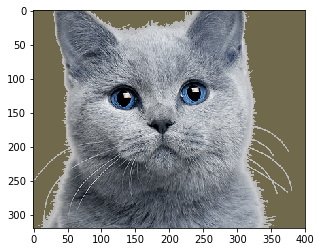

In [53]:
plt.imshow(image)

In [54]:
# what does the image look like?
image[5][10]

array([113, 105,  76], dtype=uint8)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - R,G,B Values for a coloured image

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [55]:
model = Sequential()
model.add(Convolution2D(3,    # number of filters
                        (3,    # length dimension of kernel 
                        3),    # width dimension of kernel
                        input_shape=image.shape))

In [56]:
image_batch = np.expand_dims(image,axis=0)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer - Keras accepts 4D in size.

In [57]:
image_batch.shape

(1, 320, 400, 3)

In [58]:
conv_image = model.predict(image_batch)

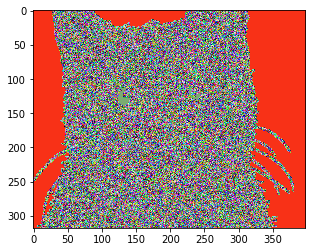

In [59]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [60]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(318, 398, 3)


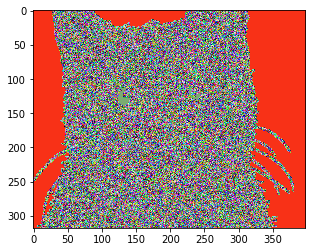

In [61]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

In [86]:
conved = convolution(image.reshape(image.shape[2],image.shape[0],image.shape[1]),c,3,1)

In [87]:
conved = np.array(conved)
conved.shape

(3, 106, 133)

In [88]:
conved1 = conved[1]

In [83]:
conved = conved.reshape(conved.shape[1], conved.shape[2], conved.shape[0])
# conved

In [89]:
conved1.shape

(106, 133)

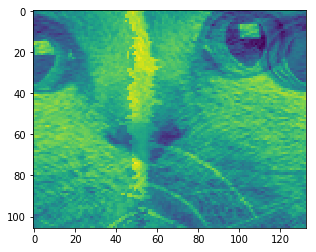

In [90]:
plt.imshow(conved1)

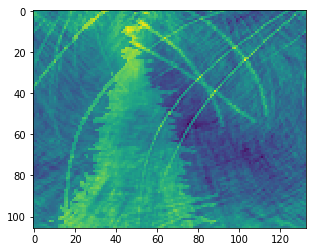

In [91]:
plt.imshow(conved[2])

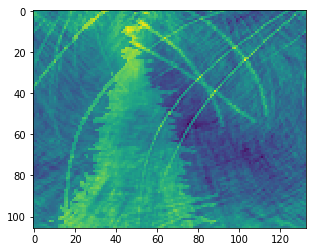

In [92]:
plt.imshow(conved[2])

## 10x10 Kernel Convimage

(311, 391, 3)


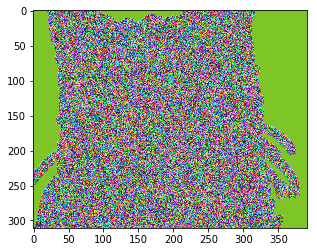

In [93]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - Features extracted will be less finer in 10x10

### Question 2

### What is the reason behing this difference ?

Answer -

# Play around with code below, to enhance your understading

## Another image Vis 

In [98]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [99]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(318, 398, 1)
(318, 398)


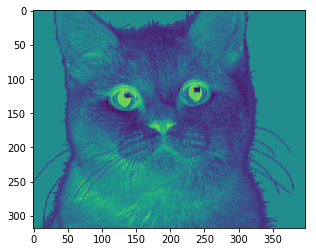

In [100]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer Kernel szie has changed so there is a change in the image

## Increase the kernal size

(306, 386, 1)
(306, 386)


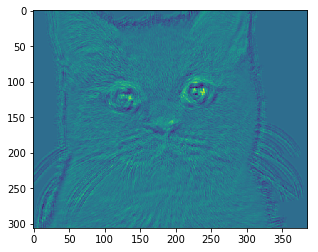

In [94]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [95]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(318, 398, 1)
(318, 398)


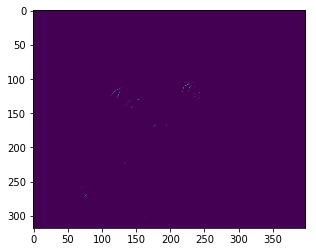

In [96]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(63, 79, 3)


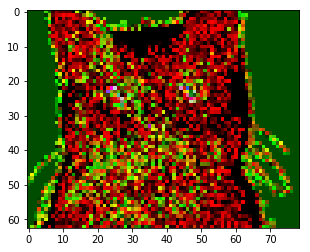

In [97]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)